In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import plot_tree, plot_importance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv(r"C:\Users\Monikesh Kakoty\Desktop\Data Science\kaggle\train.csv\train.csv")

In [5]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [6]:
df.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [9]:
df.shape

(14945, 16)

In [10]:
df.rename(columns = {'Offer %':'Offer'}, inplace = True)

In [11]:
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [12]:
df.drop(['id','title','Offer','norating1'], axis=1, inplace= True)

In [14]:
df.head()

,Rating,maincateg,platform,price1,actprice1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,698,999,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,999,1999,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,2749,4999,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,518,724,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,1379,2299,3.0,35.0,21.0,7.0,7,7,1


<AxesSubplot:>

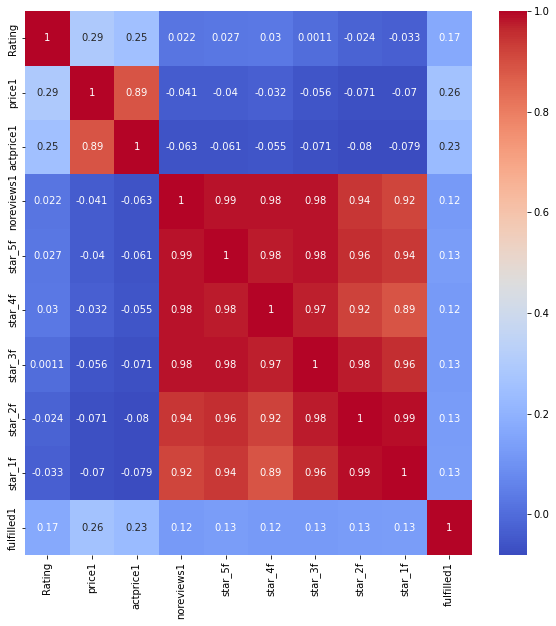

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:>

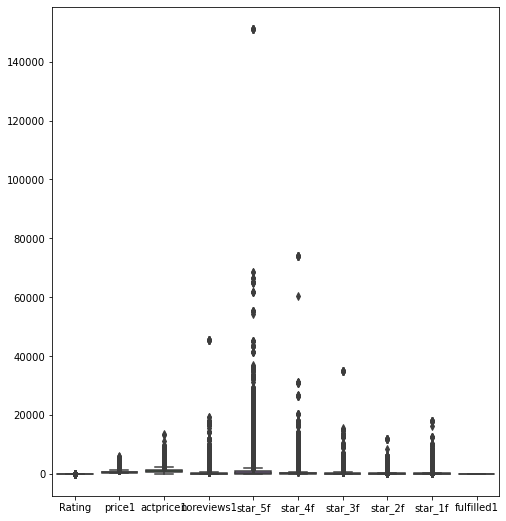

In [16]:
plt.figure(figsize=(8,9))
sns.boxplot( data= df)

<AxesSubplot:>

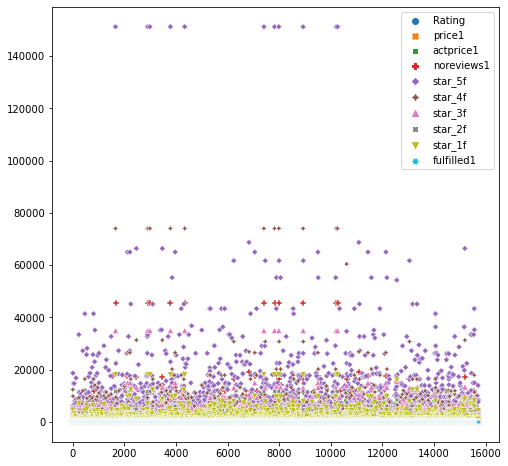

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(data= df )

In [18]:
categ= pd.get_dummies(df.maincateg, drop_first= True)
plat= pd.get_dummies(df.platform, drop_first= True)
df1= df.drop(['maincateg', 'platform'], axis=1)

In [19]:
df1= pd.concat([categ, plat, df1], axis=1)

In [20]:
df1.head()

,Women,Flipkart,Rating,price1,actprice1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,1,1,3.9,698,999,7.0,17.0,9.0,6.0,3,3,0
1,0,1,3.8,999,1999,69.0,264.0,92.0,73.0,29,73,1
2,1,1,4.4,2749,4999,4.0,11.0,3.0,2.0,1,0,1
3,0,1,4.2,518,724,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,0,1,3.9,1379,2299,3.0,35.0,21.0,7.0,7,7,1


In [32]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


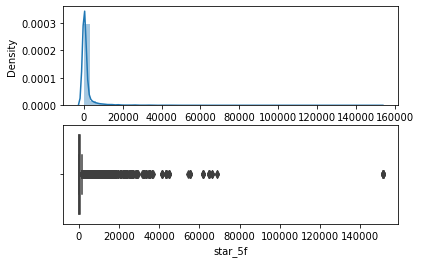

In [33]:
plot(df1,'star_5f')

In [35]:
df1['star_5f']=np.where(df1['star_5f']>=40000,df1['star_5f'].median(),df1['star_5f'])

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


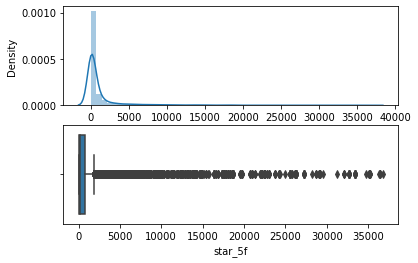

In [36]:
plot(df1,'star_5f')

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


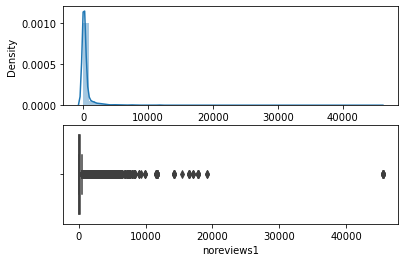

In [38]:
plot(df1,'noreviews1')

In [39]:
df1['noreviews1']=np.where(df1['noreviews1']>=10000,df1['noreviews1'].median(),df1['noreviews1'])

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


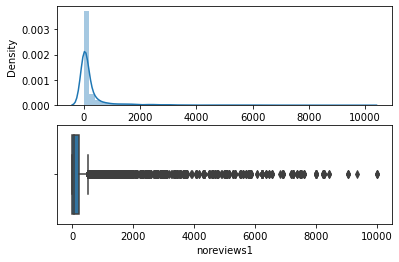

In [41]:
plot(df1,'noreviews1')

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


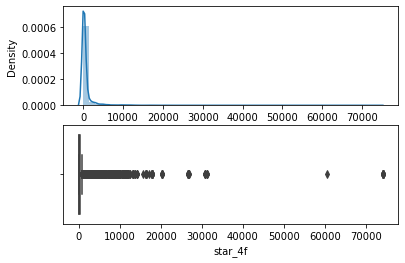

In [42]:
plot(df1,'star_4f')

In [43]:
df1['star_4f']=np.where(df1['star_4f']>=10000,df1['star_4f'].median(),df1['star_4f'])

C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monikesh Kakoty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


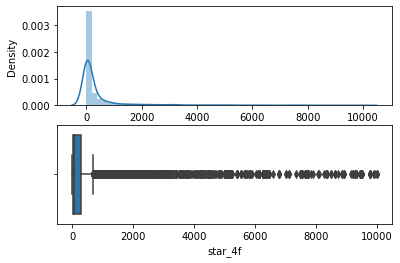

In [44]:
plot(df1,'star_4f')

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaledTrain=scaler.fit_transform(X_Train)
X_scaledTest=scaler.transform(X_Test)

In [46]:
X= df1.drop(['price1'], axis=1)
Y= df1['price1']

In [47]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test= train_test_split(X,Y, test_size=0.33, random_state= 42)

In [48]:
X_Train.columns

Index(['Women', 'Flipkart', 'Rating', 'actprice1', 'noreviews1', 'star_5f',
       'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

In [49]:
def model(method):    
    global predictions
    model_name= method
    model_name.fit(X_Train, y_Train)
    predictions= model_name.predict(X_Test)
    mae= mean_absolute_error(y_Test, predictions)
    return(print('The MAE for the method', method, 'is = ', mae))

In [50]:
model(RandomForestRegressor())
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(XGBRegressor())
model(AdaBoostRegressor())
model(ExtraTreesRegressor())

The MAE for the method RandomForestRegressor() is =  98.26280514732784
The MAE for the method LinearRegression() is =  182.6404902771661
The MAE for the method KNeighborsRegressor() is =  146.68629359286294
The MAE for the method DecisionTreeRegressor() is =  105.82184776451808
The MAE for the method XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) is =  115

In [51]:
estimator = ExtraTreesRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10)
grid.fit(X_Train, y_Train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 10, 12],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [52]:
print(grid.best_estimator_, grid.best_params_, grid.best_score_)

ExtraTreesRegressor(max_features='sqrt', n_estimators=40) {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 40} 0.9016708698015806


In [53]:
best_grid= grid.best_estimator_
P_final= best_grid.predict(X_Test)

In [54]:
mae= mean_absolute_error(y_Test, P_final)
print(mae)

81.92771053791887


In [57]:
X_TESTFINAL= pd.read_csv(r"C:\Users\Monikesh Kakoty\Desktop\Data Science\kaggle\train.csv\test.csv")
X_TESTFINAL.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [58]:
X_TESTFINAL.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [59]:
ID= X_TESTFINAL.id

In [60]:
X_TESTFINAL['star_5f']=X_TESTFINAL['star_5f'].fillna(X_TESTFINAL['star_5f'].median())
X_TESTFINAL['Rating']=X_TESTFINAL['Rating'].fillna(X_TESTFINAL['Rating'].median())
X_TESTFINAL['star_1f']=X_TESTFINAL['star_1f'].fillna(X_TESTFINAL['star_1f'].median())
X_TESTFINAL['maincateg']=X_TESTFINAL['maincateg'].fillna(X_TESTFINAL['maincateg'].mode()[0])

In [61]:
X_TESTFINAL.drop(['id','title'], axis=1, inplace= True)

In [62]:
categ= pd.get_dummies(X_TESTFINAL.maincateg, drop_first= True)
plat= pd.get_dummies(X_TESTFINAL.platform, drop_first= True)
X_TESTFINAL.drop(['maincateg', 'platform','norating1'], axis=1 , inplace=True)

In [63]:
X_TESTFINAL.shape

(5244, 9)

In [64]:
df_test= pd.concat([categ, plat, X_TESTFINAL], axis=1)

In [66]:
Y_Output= pd.DataFrame(best_grid.predict(df_test))
Y_Output.columns=['final_price']

In [67]:
Price1 =(Y_Output.final_price)

In [68]:
PREDICTIONS = pd.concat([ID,Price1], axis=1)
PREDICTIONS.columns=['ID', 'price1']

In [69]:
PREDICTIONS

,ID,price1
0,2242,431.000000
1,20532,322.862500
2,10648,499.000000
3,20677,1072.975000
4,12593,403.108333
...,...,...
5239,14033,428.300000
5240,297,707.450000
5241,18733,393.000000
5242,6162,201.841667


In [70]:

PREDICTIONS.to_csv("submissionfinal.csv", index=False)